In [12]:
%matplotlib inline

# GHG impacts from consumption of final goods

Data downloaded from https://environmentalfootprints.org/explorer using the following inputs:

<img src="ef-inputs.png">

License: [CC0](https://creativecommons.org/share-your-work/public-domain/cc0/).

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [24]:
df = pd.read_csv("Environmental footprints Data Explorer.csv")
df

,Model,Year,Stressor,Region,Sector,Parameter,Value
0,Eora,1990,GHG emissions all sources except LULUCF (GWP10...,Germany,Total,Consumption,1779837000000
1,Eora,1991,GHG emissions all sources except LULUCF (GWP10...,Germany,Total,Consumption,1854753000000
2,Eora,1992,GHG emissions all sources except LULUCF (GWP10...,Germany,Total,Consumption,1919710000000
3,Eora,1993,GHG emissions all sources except LULUCF (GWP10...,Germany,Total,Consumption,1856591000000
4,Eora,1994,GHG emissions all sources except LULUCF (GWP10...,Germany,Total,Consumption,1861514000000
...,...,...,...,...,...,...,...
79,WIODr2013,2005,GHG emissions all sources except LULUCF (GWP10...,Germany,Total,Consumption,1318468000000
80,WIODr2013,2006,GHG emissions all sources except LULUCF (GWP10...,Germany,Total,Consumption,1316478000000
81,WIODr2013,2007,GHG emissions all sources except LULUCF (GWP10...,Germany,Total,Consumption,1311824000000
82,WIODr2013,2008,GHG emissions all sources except LULUCF (GWP10...,Germany,Total,Consumption,1328556000000


In [28]:
pd.unique(df['Year'])

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013])

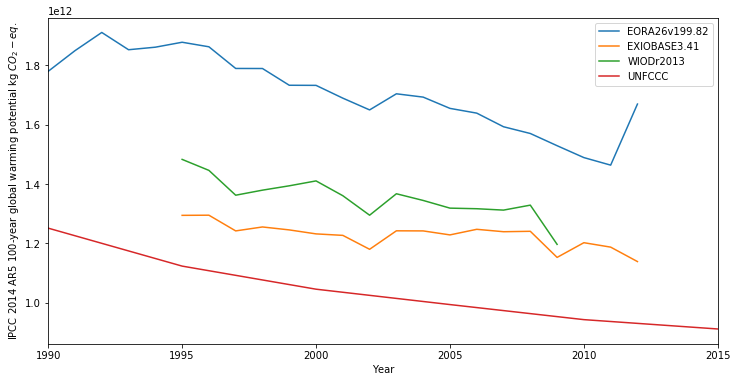

In [38]:
df[(df['Model'] != 'GTAP9') & (df['Model'] != 'EXIOBASE2.3') & (df['Model'] != 'Eora')]\
    .pivot(index='Year', columns='Model', values='Value')\
    .plot(figsize=(12,6))

# Data from https://di.unfccc.int/time_series
xs = [1990, 1995, 2000, 2005, 2010, 2015]
ys = np.array([1250992.61, 1123034.59, 1045187.43, 993343.68, 942541.89, 911049.01]) * 1e6

plt.plot(xs, ys, label="UNFCCC")
plt.legend()

plt.xlabel("Year")
plt.ylabel(r"IPCC 2014 AR5 100-year global warming potential kg $CO_{2}-eq.$")
plt.xlim(1995, 2015)
plt.xticks(np.arange(1990, 2016, 5), [1990, 1995, 2000, 2005, 2010, 2015])
plt.savefig("DE-GHG-time series.png", dpi=300)